## 🚜 Predicting the Sale Price of Bulldozers using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the **RMSLE** (root mean squared log error) between the actual and predicted auction prices.
<br>
For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation
<br><br>
<font color='red'>
Note : The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.
</font>

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

## Standard import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## import DATA

<br>

<font color=red style="font-size: x-large">
    Data description in "data dictionary" excel
</font>

In [4]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [5]:
df.head(4)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv")

## EDA (Exploratory data analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
 len(df)

412698

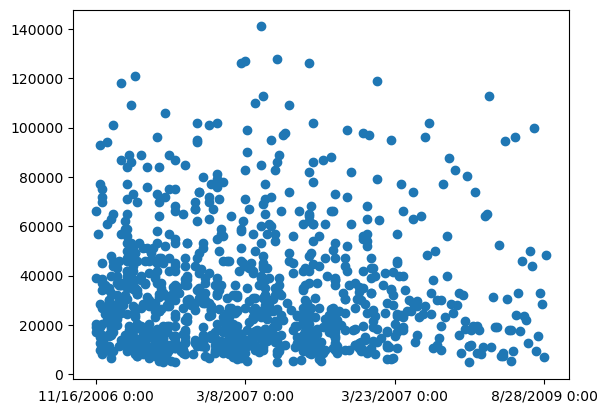

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])
plt.xticks(np.arange(0,300,75));

In [10]:
df.saledate[0], df.saledate[1000]

('11/16/2006 0:00', '7/12/2007 0:00')

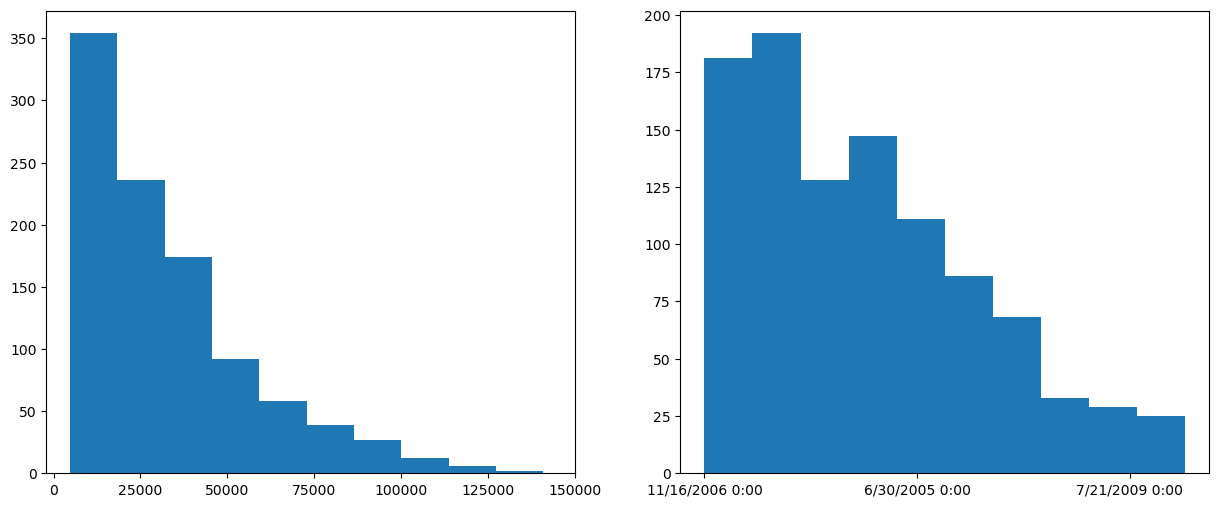

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6)) # nrows=1, ncols=2

ax1.hist(df.SalePrice[:1000])
ax2.hist(df.saledate[:1000])

plt.sca(ax1)
plt.xticks(np.arange(0,175_000,25_000))

plt.sca(ax2)
plt.xticks(np.arange(0,300,100));

## Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [12]:
df.saledate.dtype

dtype('O')

In [13]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [14]:
df.saledate.dtype # `<M8[ns]` same as `datetime64[ns]`

dtype('<M8[ns]')

In [15]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

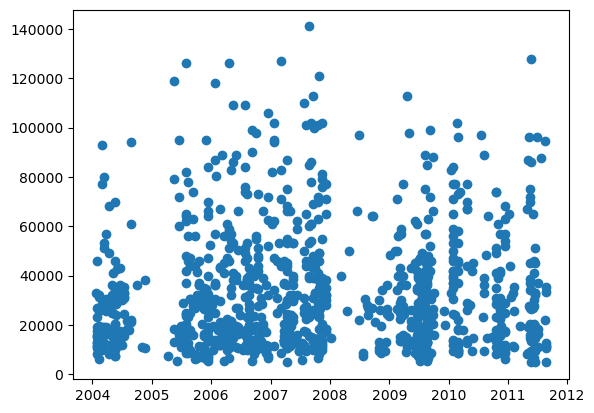

In [16]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

In [17]:
df.saledate[0], df.saledate[1000]

(Timestamp('2006-11-16 00:00:00'), Timestamp('2007-07-12 00:00:00'))

In [18]:
df.head(4)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

**We Can see that hte date are note in order**

### Sorted `df ` by saledate

**Make a copy of the original dataframe**
<br>
We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [20]:
df_copy = df.copy()

In [21]:
df.sort_values(by=["saledate"], inplace=True ,ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [22]:
df.reset_index(inplace=True, drop=True)
df.head(1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


## Add datetime parameters for `saledate` column

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [23]:
df[:1].saledate

0   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [24]:
df[:1].saledate.dt.year, df[:1].saledate.dt.month, df[:1].saledate.dt.day

(0    1989
 Name: saledate, dtype: int64,
 0    1
 Name: saledate, dtype: int64,
 0    17
 Name: saledate, dtype: int64)

In [25]:
df["saleyear"] = df.saledate.dt.year
df["salemonth"] = df.saledate.dt.month
df["saleday"] = df.saledate.dt.day
df["saledayofweek"] = df.saledate.dt.dayofweek
df["saledayofyear"] = df.saledate.dt.dayofyear

In [26]:
df.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


In [27]:
# Now we enriched our dataframe, let's remove saledate
df.drop("saledate", axis=1, inplace=True)
df.head(1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17


In [28]:
# Check the values of different columns
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've done enough EDA (Exploratory data analysis) but let's start to do some model-driven EDA.

**BUT** for now we cant create a ML model because of the string data :

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: <br>
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [29]:
pd.api.types.is_string_dtype(df.UsageBand)

True

In [30]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


**This will turn all of the string value into category values**

In [31]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) :
        df[label] = content.astype("category").cat.as_ordered()
        
        
# content.astype("category") -> Ex : `"California"` will be `0`

# cat.as_ordered() -> each columns that gets turned into a category will have an assumed order, 
# and corresponding min(), max()

In [32]:
s=pd.Series(list('abcdea')).astype('category')
s

0    a
1    b
2    c
3    d
4    e
5    a
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [33]:
s.cat.categories

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [34]:
s.cat.codes

0    0
1    1
2    2
3    3
4    4
5    0
dtype: int8

In [35]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [36]:
df.state.cat.codes

0         43
1          8
2          8
3          8
4          8
          ..
412693     4
412694     4
412695     4
412696     4
412697     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

**But we still have a bunch of missing data...**

In [37]:
df.isna().sum()/len(df) # percentage of missing value

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Fill missing values
### Fill numerical missing values first

In [38]:
def is_missing_numerical_values():
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content) :
            missing_values = content.isna().sum()
            if missing_values:
                print(f"{missing_values} - {label}")
                
is_missing_numerical_values()

20136 - auctioneerID
265194 - MachineHoursCurrentMeter


In [39]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df[label+"_is_missing"] = pd.isna(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median()) # inplace=True could have been used

is_missing_numerical_values()

## Filling and turning categorical variables into numbers

In [40]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column which tells us if the data was missing or not
        df[label+"_is_missing"] = content.isna()
        # Turn categories into numbers and add +1
        # categorical feature missing are -1
        df[label] = content.cat.codes + 1

        
# Why "+1" ? 
# content.astype("category") is "-1" if the data is missing, but we want 0

In [41]:
df.state

0         44
1          9
2          9
3          9
4          9
          ..
412693     5
412694     5
412695     5
412696     5
412697     5
Name: state, Length: 412698, dtype: int8

In [42]:
df.isna().sum().sum()

0

**Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.**

## Start Modeling

In [43]:
len(df)

412698

In [44]:
# According to the data dictionay

df_train = df[df.saleyear != 2012]
df_valid = df[df.saleyear == 2012]

X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train.SalePrice

X_valid = df_valid.drop("SalePrice", axis=1)
y_valid = df_valid.SalePrice

X_train.shape, X_valid.shape

((401125, 102), (11573, 102))

<strong>
<font color="red">
What's wrong with splitting data after filling it?
</font>
</strong>

**Remember the goal of machine learning: use the past to predict the future.<br>
So if our validation set is supposed to be representative of the future and we’re filling our training data using information from the validation set, what might this mean for our model?**

In [54]:
%%time

from sklearn.ensemble import RandomForestRegressor

full_model = RandomForestRegressor(n_jobs=-1)
full_model.fit(X_train, y_train)

CPU times: user 17min 43s, sys: 13.9 s, total: 17min 57s
Wall time: 2min 51s


RandomForestRegressor(n_jobs=-1)

In [55]:
full_model.score(X_valid, y_valid) 

0.8720634956654664

<strong>
<font color=salmon>
     not X_test and y_test, we kept them for the final test score <br>
     we will use cross_val will between training and validation<br>
     and we still have the test set<br>
    <br><br>
    for now we shearch for the best score with the validation set, then we will test it on the test set
    <br>
    NOTE : the test set is not avalid, we dont have the target column
</font>
</strong>

**`score()` methode use by default the coeficient of determination (R^2) but we want RMSLE (root mean squared log error)**

## Building an evaluation function

In [47]:
from sklearn.metrics import mean_squared_log_error

def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def show_score(model):
    # compare training prediction and validation predicton 
    # if validation pred is better than the trainin that mean our model over fitting 
    # and we dont want that
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_valid)
    scores = {
        "Train RMSLE" : RMSLE(y_train, y_train_pred), # lower is better
        "Valid RMSLE" : RMSLE(y_valid, y_val_pred),
        "Train R2 score" : model.score(X_train, y_train), # Hihgter is better
        "Valid R2 score" : model.score(X_valid, y_valid)
    }
    return scores


In [56]:
show_score(full_model)

{'Train RMSLE': 0.08422036095054095,
 'Valid RMSLE': 0.2544262754506437,
 'Train R2 score': 0.9875392343683808,
 'Valid R2 score': 0.8720634956654664}

## Testing our model on a subset (to tune the hyperparameters)

In [49]:
len(df)

412698

In [59]:
%%time

model = RandomForestRegressor(n_jobs=-1,
                             max_samples=10_000)
model.fit(X_train, y_train)

CPU times: user 33 s, sys: 528 ms, total: 33.5 s
Wall time: 5.33 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [53]:
show_score(model)

{'Train RMSLE': 0.25713812125450797,
 'Valid RMSLE': 0.293091151235119,
 'Train R2 score': 0.8609983090587435,
 'Valid R2 score': 0.8335341328507941}

## Hyerparameter tuning with RandomizedSearchCV

In [60]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rs_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10_000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                             param_distributions=rs_grid,
                             cv=5,
                             verbose=True,
                             n_iter=10)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/dorian/Documents/CODE/python/python_datascience/Regression_Project/.env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/dorian/Documents/CODE/python/python_datascience/Regression_Project/.env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/dorian/Documents/CODE/python/python_datascience/Regression_Project/.env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='aut

CPU times: user 37.3 s, sys: 12.5 s, total: 49.8 s
Wall time: 1min 34s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [63]:
show_score(rs_model)

{'Train RMSLE': 0.2763809380590362,
 'Valid RMSLE': 0.30607818712120044,
 'Train R2 score': 0.832510508100329,
 'Valid R2 score': 0.8049085573653627}

## Train a model with the best hyperparamters
**Note** : These were found after 100 iterations of RandomizedSearchCV.

In [64]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None
                                   ) 

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 3min 11s, sys: 2.44 s, total: 3min 14s
Wall time: 32.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [65]:
show_score(ideal_model)

{'Train RMSLE': 0.1446714351488326,
 'Valid RMSLE': 0.24523929112676313,
 'Train R2 score': 0.9589070897735053,
 'Valid R2 score': 0.8822319489394355}

### Histogram error : 

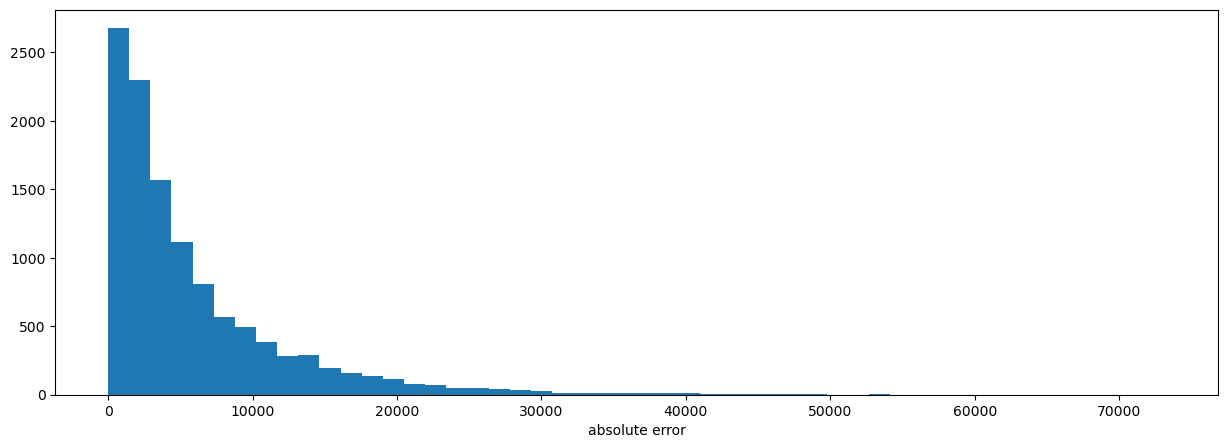

In [113]:
y_preds = ideal_model.predict(X_valid)

hist_abs_err = np.abs(y_preds - y_valid)

fig, ax = plt.subplots(figsize=(15,5))
ax.hist(hist_abs_err, bins=50)
plt.xlabel("absolute error");

### Learning curve

[learning_curve] Training set sizes: [ 40112  57303  74494  91685 108876 126067 143258 160449]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1min 9s, sys: 9.97 s, total: 1min 19s
Wall time: 2min 46s


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  2.8min finished


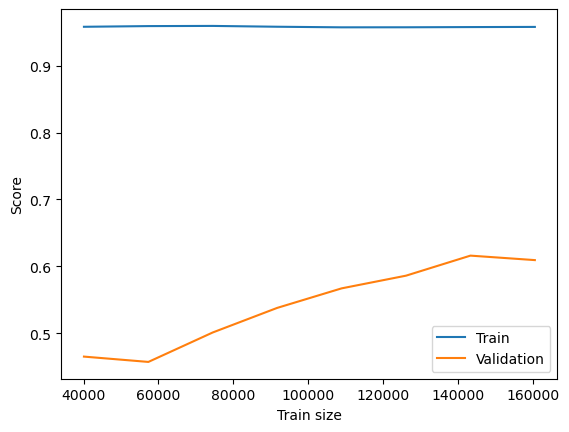

In [112]:
%%time

from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(ideal_model, 
                                           X_train, 
                                           y_train, 
                                           train_sizes=np.linspace(0.2, 0.8, 8), 
                                           cv=2,
                                           verbose=True
                                          )

# dont forget, every score have 5 "version" due to the crosse validation
plt.plot(N, train_score.mean(axis=1), label="Train")
plt.plot(N, val_score.mean(axis=1), label="Validation")
plt.xlabel("Train size")
plt.ylabel("Score")
plt.legend()

## Make predictions on test data
### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [82]:
def process_data(df):
    df.sort_values(by=["saledate"], inplace=True ,ascending=True)
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["saledayofweek"] = df.saledate.dt.dayofweek
    df["saledayofyear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df.items():
        
        if pd.api.types.is_string_dtype(content) :
            
            # Add a binary column which tells us if the data was missing or not
            df[label+"_is_missing"] = content.isna()
            # Turn categories into numbers and add +1
            # categorical feature missing are -1
            df[label] = pd.Categorical(content).codes + 1
        
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isna(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

    return df

In [83]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [84]:
df_test = process_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


In [85]:
# Missing one column :
set(X_train) - set(df_test)

{'auctioneerID_is_missing'}

In [86]:
# `auctioneerID` is not missing on the test set -> add manualy a False column
df_test["auctioneerID_is_missing"] = False

In [87]:
y_pred = ideal_model.predict(df_test)
y_pred

/Users/dorian/Documents/CODE/python/python_datascience/Regression_Project/.env/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([15372.53879242, 18966.36787425, 24723.61923896, ...,
       48147.82240618, 45842.65114872, 38323.97301293])

FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

In [88]:
from sklearn import __version__
__version__

'1.1.1'

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

**google : "sklearn feature importance RandomForestRegressor"**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_

In [90]:
feature_importance = ideal_model.feature_importances_
feature_importance[:10]

array([0.03300538, 0.01716766, 0.04114502, 0.00179589, 0.00334774,
       0.20180535, 0.00331412, 0.00102029, 0.04620849, 0.03561087])

In [106]:
def plot_feature(columns, feature, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": feature})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

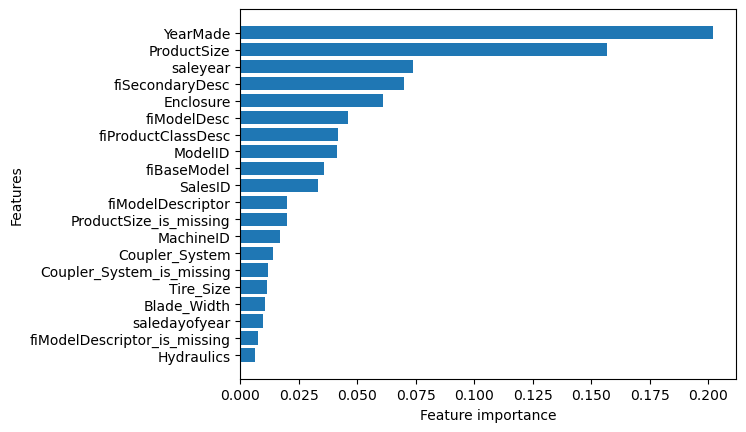

In [107]:
plot_feature(X_train.columns, feature_importance)